# Machine Learning Project Template
* This notebook provides a structured template for building an end-to-end machine learning project.
* Re-use this notebook througout your learning and in capstone project

## <b> <font color=green> STEP (1) Problem Definition, Scoping & Framing </font> </b>

**Problem Definition:**  
Develop a machine learning model to predict the most suitable crops and vegetation types for specific geographic areas in Oman based on environmental data (e.g., climate and geographic variables such as temperature, humidity, elevation, and location). Additionally, enable reverse prediction to identify suitable geographic locations for selected crops or vegetation.

**Objective:**  
- Assist farmers and agricultural planners in Oman to optimize crop selection according to local environmental conditions.  
- Save time and reduce costs by eliminating the need to manually test and experiment with different crops in every region.  
- Improve agricultural productivity and sustainability by aligning crop choices with geographic and climatic factors.

**Scope:**  
- Use geographic and climate data (latitude, longitude, altitude, temperature, humidity, rainfall, etc.).  
- Exclude soil and its chemical or physical components from this model, since they can be adjusted and managed, unlike fixed environmental factors such as climate.  
- Focus on major crop types cultivated in Oman and relevant vegetation covers.  
- Target regions within Oman with available environmental and agricultural data.  
- Deliver a classification model for crop and vegetation suitability prediction.

**Framing:**  
This project fits into agricultural AI applications aimed at sustainable farming. It leverages data science to support informed decision-making in crop planning, helping maximize yield and reduce resource waste while considering Oman’s unique environmental conditions.


### 1.1) Load Libraries
Import all necessary libraries for the project.

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1.2) Load The Dataset
Load the dataset and display the first few rows.

In [410]:
crops_dataset = "https://raw.githubusercontent.com/Intisar3/ML-DL/main/Capstone%20Project/Crop_recommendation.csv"
climate_dataset = "https://raw.githubusercontent.com/Intisar3/ML-DL/main/Capstone%20Project/ObservationData_odligxf.csv"

#I hosted the datasets in my github repo to avoid the errors that I kept getting cuz of local hosting

crop_df = pd.read_csv(crops_dataset)
climate_df = pd.read_csv(climate_dataset)

In [371]:
crop_df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [372]:
climate_df.head()

regions           indicators stations season            Unit    Date  Value
0  Muscat  Average Temperature    Total  Total  degree celsius  2011M1   21.5
1  Muscat  Average Temperature    Total  Total  degree celsius  2011M2   22.8
2  Muscat  Average Temperature    Total  Total  degree celsius  2011M3   25.9
3  Muscat  Average Temperature    Total  Total  degree celsius  2011M4   29.5
4  Muscat  Average Temperature    Total  Total  degree celsius  2011M5   35.1

## <b> <font color=green> STEP (2) Data Exploration & Understanding </font> </b>

### 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [373]:
crop_df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [374]:
print("\nNumeric Columns Summary:")
display(crop_df.select_dtypes(include='number').describe())


Numeric Columns Summary:


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [375]:
print("\nCategorical Columns Value Counts:")
for col in crop_df.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(crop_df[col].value_counts())


Categorical Columns Value Counts:

label value counts:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [376]:
print("\nMissing Values:")
print(crop_df.isnull().sum())


Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [377]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [378]:
climate_df.describe()

Value
count  3423.000000
mean     29.581196
std      21.900722
min       0.000000
25%      12.885000
50%      28.800000
75%      43.100000
max     351.000000

In [379]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423 entries, 0 to 3422
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regions     3423 non-null   object 
 1   indicators  3423 non-null   object 
 2   stations    3423 non-null   object 
 3   season      3423 non-null   object 
 4   Unit        3423 non-null   object 
 5   Date        3423 non-null   object 
 6   Value       3423 non-null   float64
dtypes: float64(1), object(6)
memory usage: 187.3+ KB


In [380]:
print("\nMissing Values:")
print(climate_df.isnull().sum())


Missing Values:
regions       0
indicators    0
stations      0
season        0
Unit          0
Date          0
Value         0
dtype: int64


In [381]:
print("\nCategorical Columns Value Counts (Climate Dataset):")
for col in climate_df.select_dtypes(include='object').columns:
    print(f"\n{col} value counts:")
    print(climate_df[col].value_counts())


Categorical Columns Value Counts (Climate Dataset):

regions value counts:
regions
Ad Dakhliyah           320
Ash Sharqiyah South    317
Dhofar                 317
Al Wusta               315
Al Buraymi             313
Ash Sharqiyah North    313
Musandam               312
Muscat                 308
Al Batinah North       308
Adh Dhahirah           307
Al Batinah South       293
Name: count, dtype: int64

indicators value counts:
indicators
Average Humidity       1177
Average Temperature    1171
Average Rainfall       1075
Name: count, dtype: int64

stations value counts:
stations
Total    3423
Name: count, dtype: int64

season value counts:
season
Total    3423
Name: count, dtype: int64

Unit value counts:
Unit
%                 1177
degree celsius    1171
M. M              1075
Name: count, dtype: int64

Date value counts:
Date
2014M5     33
2014M4     33
2014M3     33
2014M2     33
2014M8     33
           ..
2011M9     25
2011M12    25
2012M2     25
2012M3     25
2011M6     24
Name:

### 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

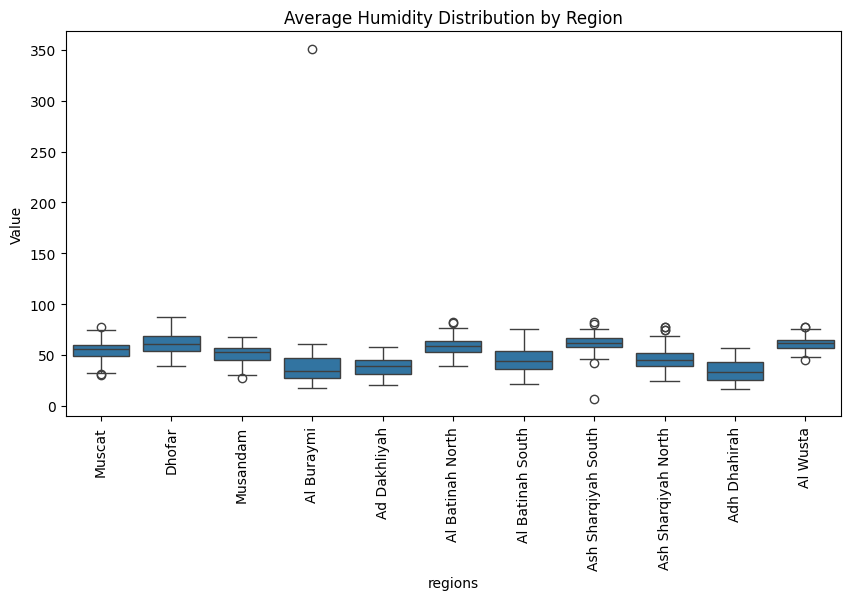

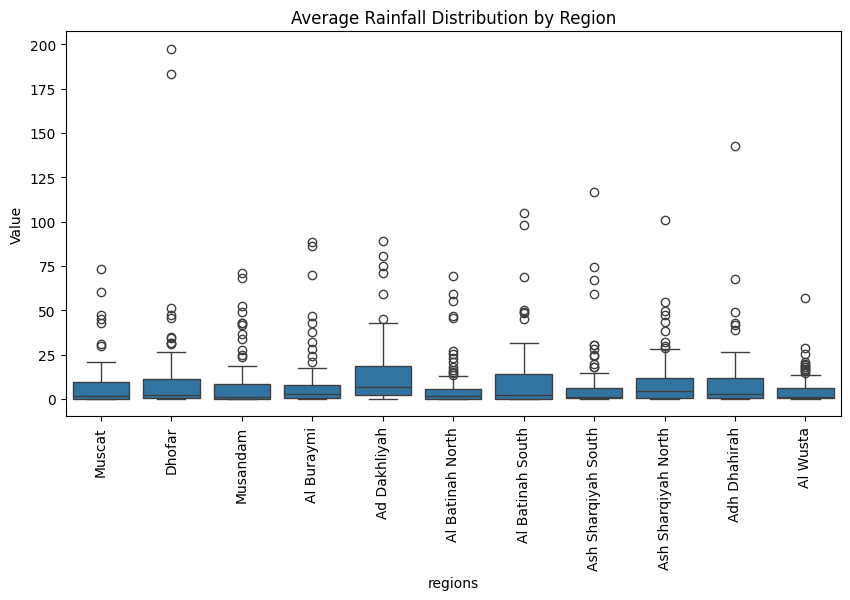

In [382]:
for indicator in climate_df['indicators'].unique():
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=climate_df[climate_df['indicators'] == indicator], x='regions', y='Value')
    plt.title(f'{indicator} Distribution by Region')
    plt.xticks(rotation=90)
    plt.show()

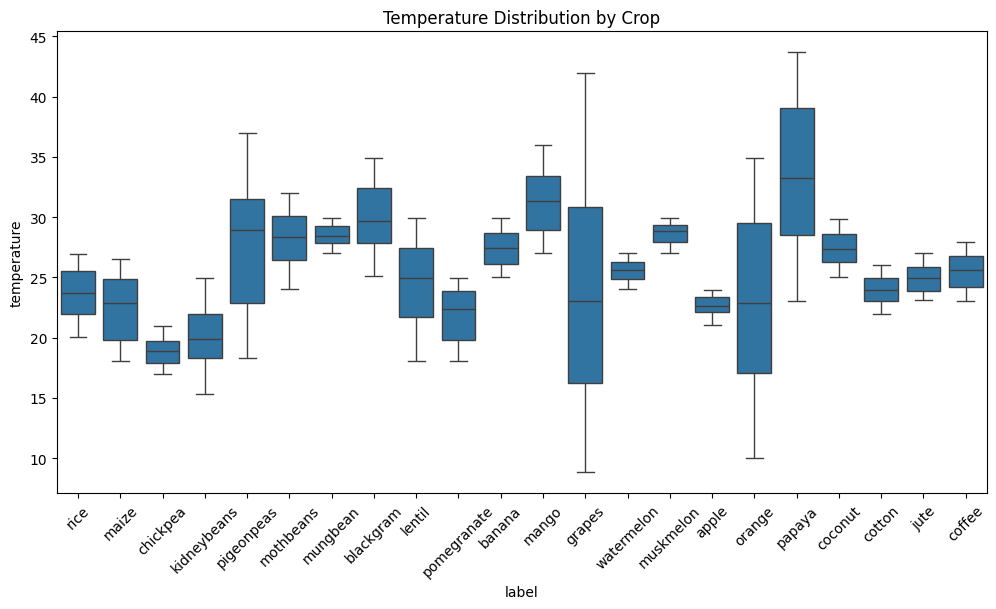

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crop_df, x='label', y='temperature')
plt.xticks(rotation=45)
plt.title('Temperature Distribution by Crop')
plt.show()

In [69]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crop_df, x='label', y='humidity')
plt.xticks(rotation=45)
plt.title('Humidity Distribution by Crop')
plt.show()

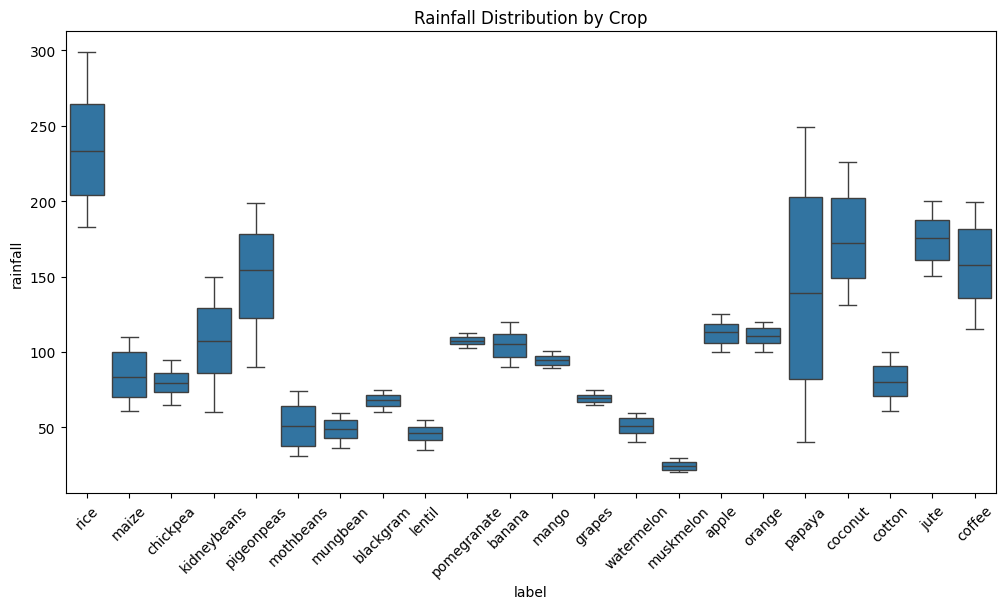

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crop_df, x='label', y='rainfall')
plt.xticks(rotation=45)
plt.title('Rainfall Distribution by Crop')
plt.show()

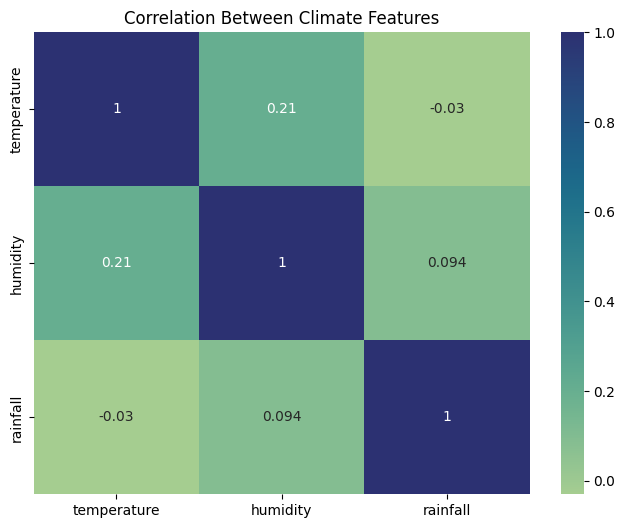

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(crop_df[['temperature', 'humidity', 'rainfall']].corr(), annot=True, cmap='crest')
plt.title('Correlation Between Climate Features')
plt.show()

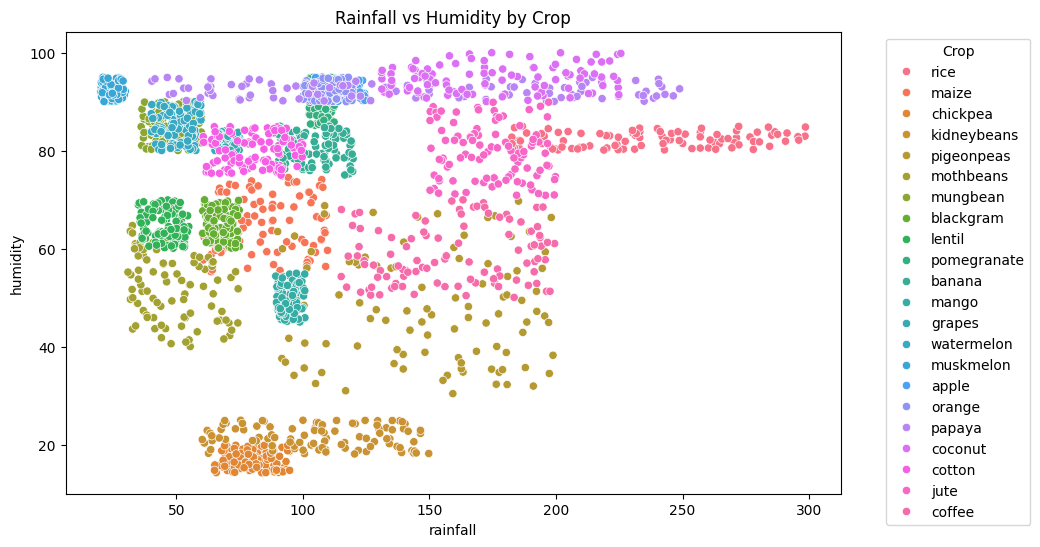

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=crop_df, x='rainfall', y='humidity', hue='label')
plt.title('Rainfall vs Humidity by Crop')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

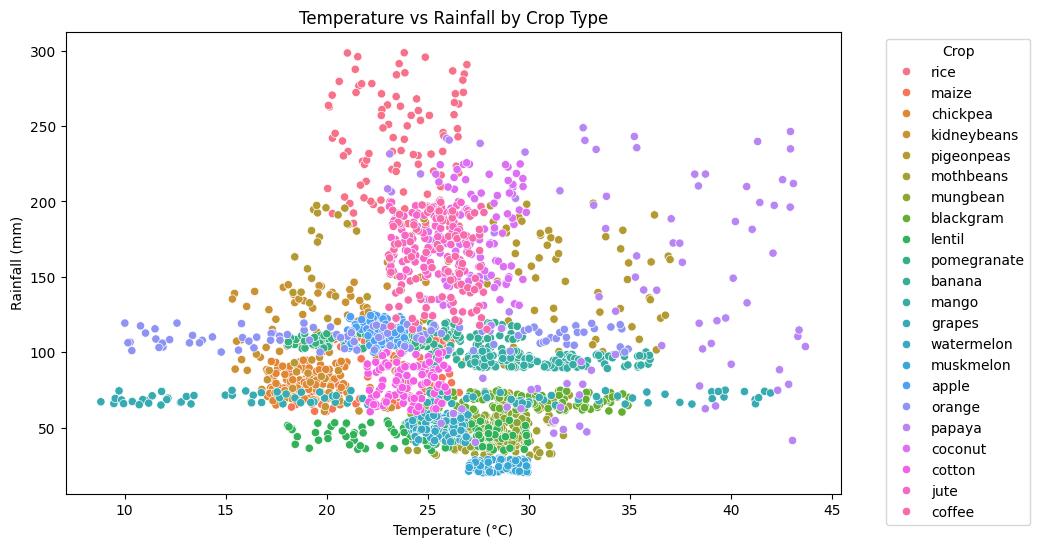

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=crop_df, x='temperature', y='rainfall', hue='label')
plt.title('Temperature vs Rainfall by Crop Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

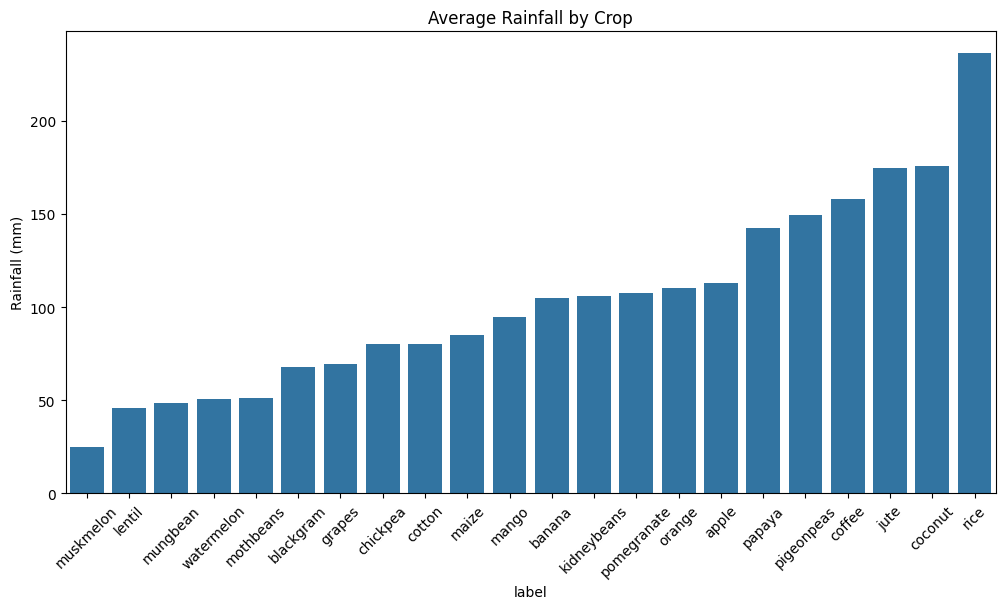

In [77]:
avg_rain = crop_df.groupby('label')['rainfall'].mean().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rain.index, y=avg_rain.values)
plt.xticks(rotation=45)
plt.title('Average Rainfall by Crop')
plt.ylabel('Rainfall (mm)')
plt.show()

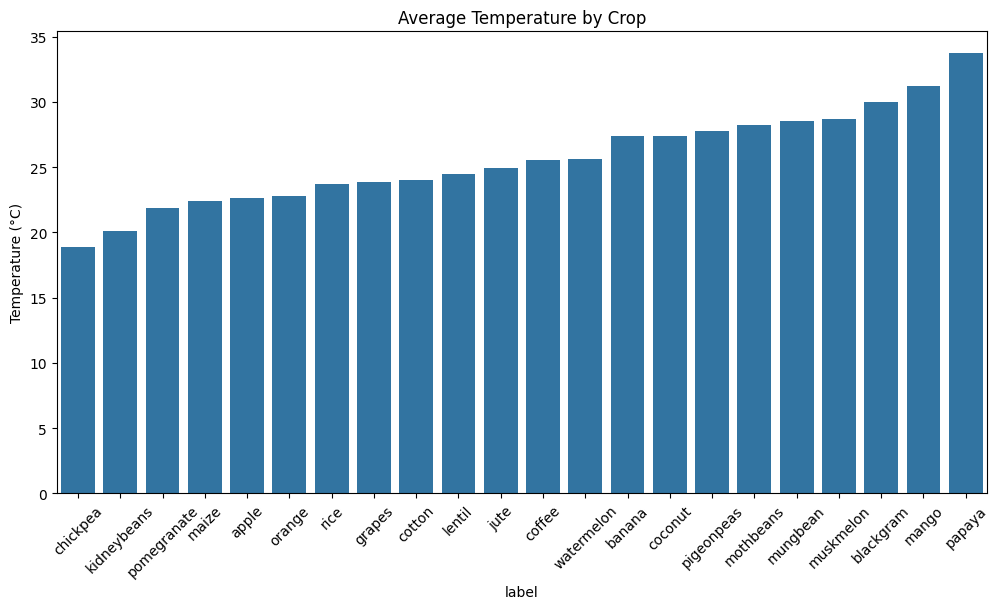

In [78]:
avg_temp = crop_df.groupby('label')['temperature'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_temp.index, y=avg_temp.values)
plt.xticks(rotation=45)
plt.title('Average Temperature by Crop')
plt.ylabel('Temperature (°C)')
plt.show()

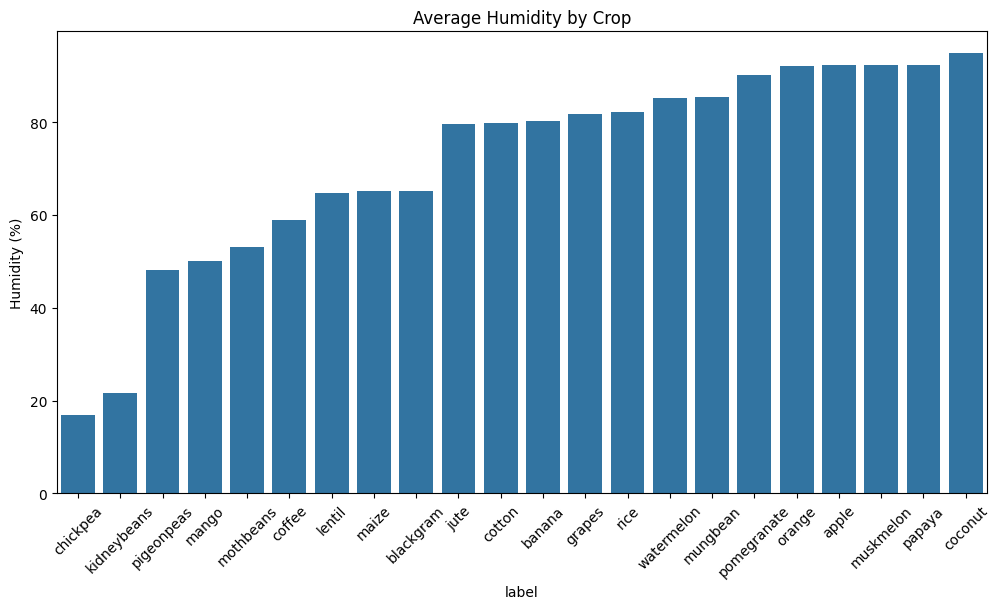

In [79]:
avg_humidity = crop_df.groupby('label')['humidity'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_humidity.index, y=avg_humidity.values)
plt.xticks(rotation=45)
plt.title('Average Humidity by Crop')
plt.ylabel('Humidity (%)')
plt.show()

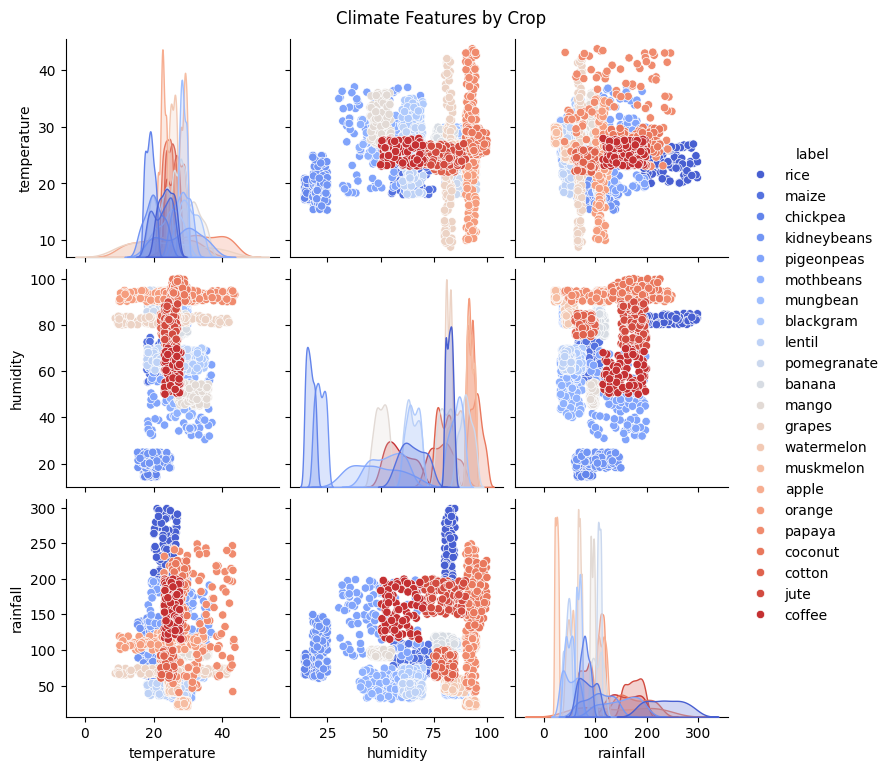

In [67]:
sns.pairplot(crop_df[['temperature', 'humidity', 'rainfall', 'label']], hue='label', diag_kind='kde', palette='coolwarm')
plt.suptitle('Climate Features by Crop', y=1.02)
plt.show()

## <b> <font color=green> STEP (3) Data Preparation & Feature Engineering </font> </b>

### 3.1) Data Cleaning
Handle missing values and outliers.

In [383]:
print("Missing values in crop_df:")
crop_df.isnull().sum()

Missing values in crop_df:


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [385]:
print("\nMissing values in climate_df:")
climate_df.isnull().sum()


Missing values in climate_df:


regions       0
indicators    0
stations      0
season        0
Unit          0
Date          0
Value         0
dtype: int64

In [286]:
climate_features = ['temperature', 'humidity', 'rainfall']

# Detect outliers using IQR
for feature in climate_features:
    Q1 = crop_df[feature].quantile(0.25)
    Q3 = crop_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers1 = crop_df[(crop_df[feature] < lower_bound) | (crop_df[feature] > upper_bound)]
    print(f"{feature} has {len(outliers1)} outliers")

temperature has 86 outliers
humidity has 30 outliers
rainfall has 100 outliers


In [243]:
 outliers1

N   P   K  temperature   humidity        ph    rainfall    label
1     85  58  41    21.770462  80.319644  7.038096  226.655537     rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248     rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034     rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340     rice
5     69  37  42    23.058049  83.370118  7.073454  251.055000     rice
...   ..  ..  ..          ...        ...       ...         ...      ...
1867   3  23  30    29.701432  95.657544  6.078807  215.196804  coconut
1881  19  30  30    29.565492  91.408963  5.826381  224.831573  coconut
1886   8  15  33    28.973187  98.098610  5.501580  213.901102  coconut
1892   3   9  35    26.916419  99.846716  6.318553  225.632366  coconut
1894  27   8  30    26.446001  98.299378  6.008386  221.225817  coconut

[100 rows x 8 columns]

In [386]:
feature = 'Value'

Q1 = climate_df[feature].quantile(0.25)
Q3 = climate_df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = climate_df[(climate_df[feature] < lower_bound) | (climate_df[feature] > upper_bound)]
print(f"{feature} has {len(outliers1)} outliers")

Value has 100 outliers


In [ ]:
#do i need to get rid of them or not? why?

In [247]:
outliers

regions        indicators stations season  Unit     Date  \
605                Dhofar  Average Rainfall    Total  Total  M. M   2018M5   
617                Dhofar  Average Rainfall    Total  Total  M. M   2020M5   
1111           Al Buraymi  Average Humidity    Total  Total     %   2016M7   
1216           Al Buraymi  Average Rainfall    Total  Total  M. M   2017M3   
1524         Ad Dakhliyah  Average Rainfall    Total  Total  M. M   2016M3   
2120     Al Batinah South  Average Rainfall    Total  Total  M. M  2015M10   
2125     Al Batinah South  Average Rainfall    Total  Total  M. M   2016M3   
2433  Ash Sharqiyah South  Average Rainfall    Total  Total  M. M   2015M6   
2755  Ash Sharqiyah North  Average Rainfall    Total  Total  M. M   2016M3   
3027         Adh Dhahirah  Average Rainfall    Total  Total  M. M   2013M2   

       Value  
605   183.20  
617   197.40  
1111  351.00  
1216   88.50  
1524   89.00  
2120   98.20  
2125  104.70  
2433  116.47  
2755  101.00  
3027  142.40

### 3.1) Feature Selection
Select the most relevant features for the model.

 we intentionally exclude soil-based features such as N, P, K, and ph since the focus is on climate-based crop recommendations. These nutrient features are controllable, while climate features are not.

We will only keep these features:

- temperature
- humidity
- rainfall

In [411]:
print(crop_df.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [412]:
selected_features = ['temperature', 'humidity', 'rainfall']
target = 'label'

X = crop_df[selected_features]
y = crop_df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Selected features:", selected_features)

X shape: (2200, 3)
y shape: (2200,)
Selected features: ['temperature', 'humidity', 'rainfall']


In [413]:
climate_selected_features = ['regions', 'Average Temperature', 'Average Humidity', 'Average Rainfall']
X_climate = climate_wide[climate_selected_features]
print(X_climate.head(50))


#do we need this?
#idk think so, just experminting

indicators       regions  Average Temperature  Average Humidity  \
0           Ad Dakhliyah                15.40             55.00   
1           Ad Dakhliyah                23.10             41.70   
2           Ad Dakhliyah                19.80             58.00   
3           Ad Dakhliyah                16.40             43.00   
4           Ad Dakhliyah                16.60             47.20   
5           Ad Dakhliyah                21.10             31.10   
6           Ad Dakhliyah                23.60             33.30   
7           Ad Dakhliyah                28.50             29.90   
8           Ad Dakhliyah                31.30             25.90   
9           Ad Dakhliyah                29.80             35.60   
10          Ad Dakhliyah                29.00             43.90   
11          Ad Dakhliyah                28.20             33.80   
12          Ad Dakhliyah                16.00             48.40   
13          Ad Dakhliyah                24.70             31.7

### 3.2) Data Transforms
Apply transformations to prepare the data for modeling.

##### Since label (crop types) is categorical, encode it into numeric values for the model:

In [417]:
"""# Pivot climate dataset to wide format for easier feature extraction
climate_wide = climate_df.pivot_table(
    index=['regions', 'stations', 'season', 'Date'], 
    columns='indicators', 
    values='Value'
).reset_index()

print("Pivoted climate data sample:")
print(climate_wide.head())

# Select features from pivoted data using the correct column names
selected_features = ['Average Temperature', 'Average Humidity', 'Average Rainfall']
X = climate_wide[selected_features]
"""

Pivoted climate data sample:
indicators       regions stations season     Date  Average Humidity  \
0           Ad Dakhliyah    Total  Total   2011M1              55.0   
1           Ad Dakhliyah    Total  Total  2011M10              41.7   
2           Ad Dakhliyah    Total  Total  2011M11              58.0   
3           Ad Dakhliyah    Total  Total  2011M12              43.0   
4           Ad Dakhliyah    Total  Total   2011M2              47.2   

indicators  Average Rainfall  Average Temperature  
0                       17.7                 15.4  
1                        3.7                 23.1  
2                       32.3                 19.8  
3                        NaN                 16.4  
4                        1.5                 16.6  


In [409]:
print("crop_df columns:", crop_df.columns.tolist())
print("climate_wide columns:", climate_wide.columns.tolist())


crop_df columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
climate_wide columns: ['regions', 'stations', 'season', 'Date', 'Average Humidity', 'Average Rainfall', 'Average Temperature']


In [426]:
"""# Merge step
merged_df = pd.merge(crop_df, climate_wide, how='inner', on=['regions', 'Date'])

# Feature/target prep (must come from merged_df only)
feature_cols = ['Average Temperature', 'Average Humidity', 'Average Rainfall']
target_col = 'target'

# Drop rows with missing data
merged_df = merged_df.dropna(subset=feature_cols + [target_col])

# Create X and y
X = merged_df[feature_cols]
y = merged_df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
"""

"# Merge step\nmerged_df = pd.merge(crop_df, climate_wide, how='inner', on=['regions', 'Date'])\n\n# Feature/target prep (must come from merged_df only)\nfeature_cols = ['Average Temperature', 'Average Humidity', 'Average Rainfall']\ntarget_col = 'target'\n\n# Drop rows with missing data\nmerged_df = merged_df.dropna(subset=feature_cols + [target_col])\n\n# Create X and y\nX = merged_df[feature_cols]\ny = merged_df[target_col]\n\n# Scale features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Encode target\nlabel_encoder = LabelEncoder()\ny_encoded = label_encoder.fit_transform(y)\n"

In [419]:
from sklearn.preprocessing import LabelEncoder
y = crop_df['label']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# mapping DataFrame
label_mapping_df = pd.DataFrame({
    'Crop': le.classes_,
    'Encoded Label': le.transform(le.classes_)
})

print("Label Encoding Mapping:")
print(label_mapping_df.to_string(index=False))


Label Encoding Mapping:
       Crop  Encoded Label
      apple              0
     banana              1
  blackgram              2
   chickpea              3
    coconut              4
     coffee              5
     cotton              6
     grapes              7
       jute              8
kidneybeans              9
     lentil             10
      maize             11
      mango             12
  mothbeans             13
   mungbean             14
  muskmelon             15
     orange             16
     papaya             17
 pigeonpeas             18
pomegranate             19
       rice             20
 watermelon             21


In [428]:
"""
I used StandardScaler because the feature values (like temperature, humidity, and rainfall)
had very different scales. If I didn’t scale them, the model might focus more on the features
with larger values and ignore the others.
After scaling, all features are on the same level, so the model can learn from them equally.
"""
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [427]:
print(X.columns)


Index(['temperature', 'humidity', 'rainfall', 'Average Temperature',
       'Average Humidity', 'Average Rainfall'],
      dtype='object')


In [430]:
#original data
crop_selected_features = ['temperature', 'humidity', 'rainfall']
crop_df[crop_selected_features].head()


temperature   humidity    rainfall
0    20.879744  82.002744  202.935536
1    21.770462  80.319644  226.655537
2    23.004459  82.320763  263.964248
3    26.491096  80.158363  242.864034
4    20.130175  81.604873  262.717340

In [424]:
# Means close to 0 after scaling
X_scaled_df.mean()

Average Temperature    5.430707e-16
Average Humidity      -1.448855e-16
Average Rainfall       1.652425e-17
dtype: float64

In [425]:
# Standard deviations close to 1 after scaling
X_scaled_df.std()

Average Temperature    1.000427
Average Humidity       1.000425
Average Rainfall       1.000465
dtype: float64

## <b> <font color=green> STEP (4)  ML Model Selection & Evaluation </font> </b>

### 4.1) Split-out Validation Dataset
Split the dataset into training and validation sets.

In [447]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)

total = len(y_encoded)
train_pct = (len(y_train) / total) * 100
test_pct = (len(y_test) / total) * 100

print(f"Training set: {len(y_train)} samples ({train_pct:.2f}%)")
print(f"Validation set: {len(y_test)} samples ({test_pct:.2f}%)")


ValueError: Found input variables with inconsistent numbers of samples: [2332000, 2200]

In [437]:
print("Original X shape:", X.shape)
print(X[:5])


Original X shape: (2332000, 6)
   temperature   humidity    rainfall  Average Temperature  Average Humidity  \
0    20.879744  82.002744  202.935536                 15.4              55.0   
1    20.879744  82.002744  202.935536                 23.1              41.7   
2    20.879744  82.002744  202.935536                 19.8              58.0   
4    20.879744  82.002744  202.935536                 16.6              47.2   
6    20.879744  82.002744  202.935536                 23.6              33.3   

   Average Rainfall  
0              17.7  
1               3.7  
2              32.3  
4               1.5  
6               6.5  


In [438]:
print("Original y shape:", y.shape)
print(y[:5])


Original y shape: (2200,)
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


In [439]:
print("X_scaled shape:", X_scaled.shape)
print(X_scaled[:5])


X_scaled shape: (2332000, 6)
[[-0.93558693  0.47266646  1.8103605  -2.37129647  0.28912065  0.54458146]
 [-0.93558693  0.47266646  1.8103605  -0.92893839 -0.50111257 -0.29358951]
 [-0.93558693  0.47266646  1.8103605  -1.54709185  0.46736875  1.41867404]
 [-0.93558693  0.47266646  1.8103605  -2.14651339 -0.1743244  -0.42530209]
 [-0.93558693  0.47266646  1.8103605  -0.83527877 -1.00020724 -0.12595532]]


In [440]:
print("y_encoded shape:", y_encoded.shape)
print(y_encoded[:5])


y_encoded shape: (2200,)
[20 20 20 20 20]


In [407]:

# 4.2) Model Selection with Cross-Validation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
}

print("\nCross-Validation Accuracy (5-Fold):")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y_encoded, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f}")


Cross-Validation Accuracy (5-Fold):


ValueError: Found input variables with inconsistent numbers of samples: [1186, 2200]

### 4.2) Test Options and Evaluation Metric
Define the evaluation metric for the model.

In [310]:
#this function is going to help us know how good and accurate does themodel work 
#as we go there are sevelral changes that will occure on the model and will need to cotinously evaluate it

def evaluate_model(y_true, y_pred, labels):

    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))


    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 4.3) Spot Check Algorithms
Test multiple algorithms to identify the best-performing one.

In [311]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [313]:
logreg_preds = lr_model.predict(X_test)
evaluate_model(y_test, logreg_preds, le.classes_)

Accuracy: 0.7659

Classification Report:
              precision    recall  f1-score   support

       apple       0.48      0.80      0.60        20
      banana       0.90      0.90      0.90        20
   blackgram       0.87      1.00      0.93        20
    chickpea       0.72      0.90      0.80        20
     coconut       0.71      1.00      0.83        20
      coffee       0.79      0.95      0.86        20
      cotton       0.75      0.75      0.75        20
      grapes       0.69      0.55      0.61        20
        jute       0.84      0.80      0.82        20
 kidneybeans       0.75      0.60      0.67        20
      lentil       0.77      0.85      0.81        20
       maize       0.74      0.70      0.72        20
       mango       0.91      1.00      0.95        20
   mothbeans       0.78      0.70      0.74        20
    mungbean       0.83      0.95      0.88        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.33      0.20      0

In [315]:
DTC_model = DecisionTreeClassifier(random_state=42)
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

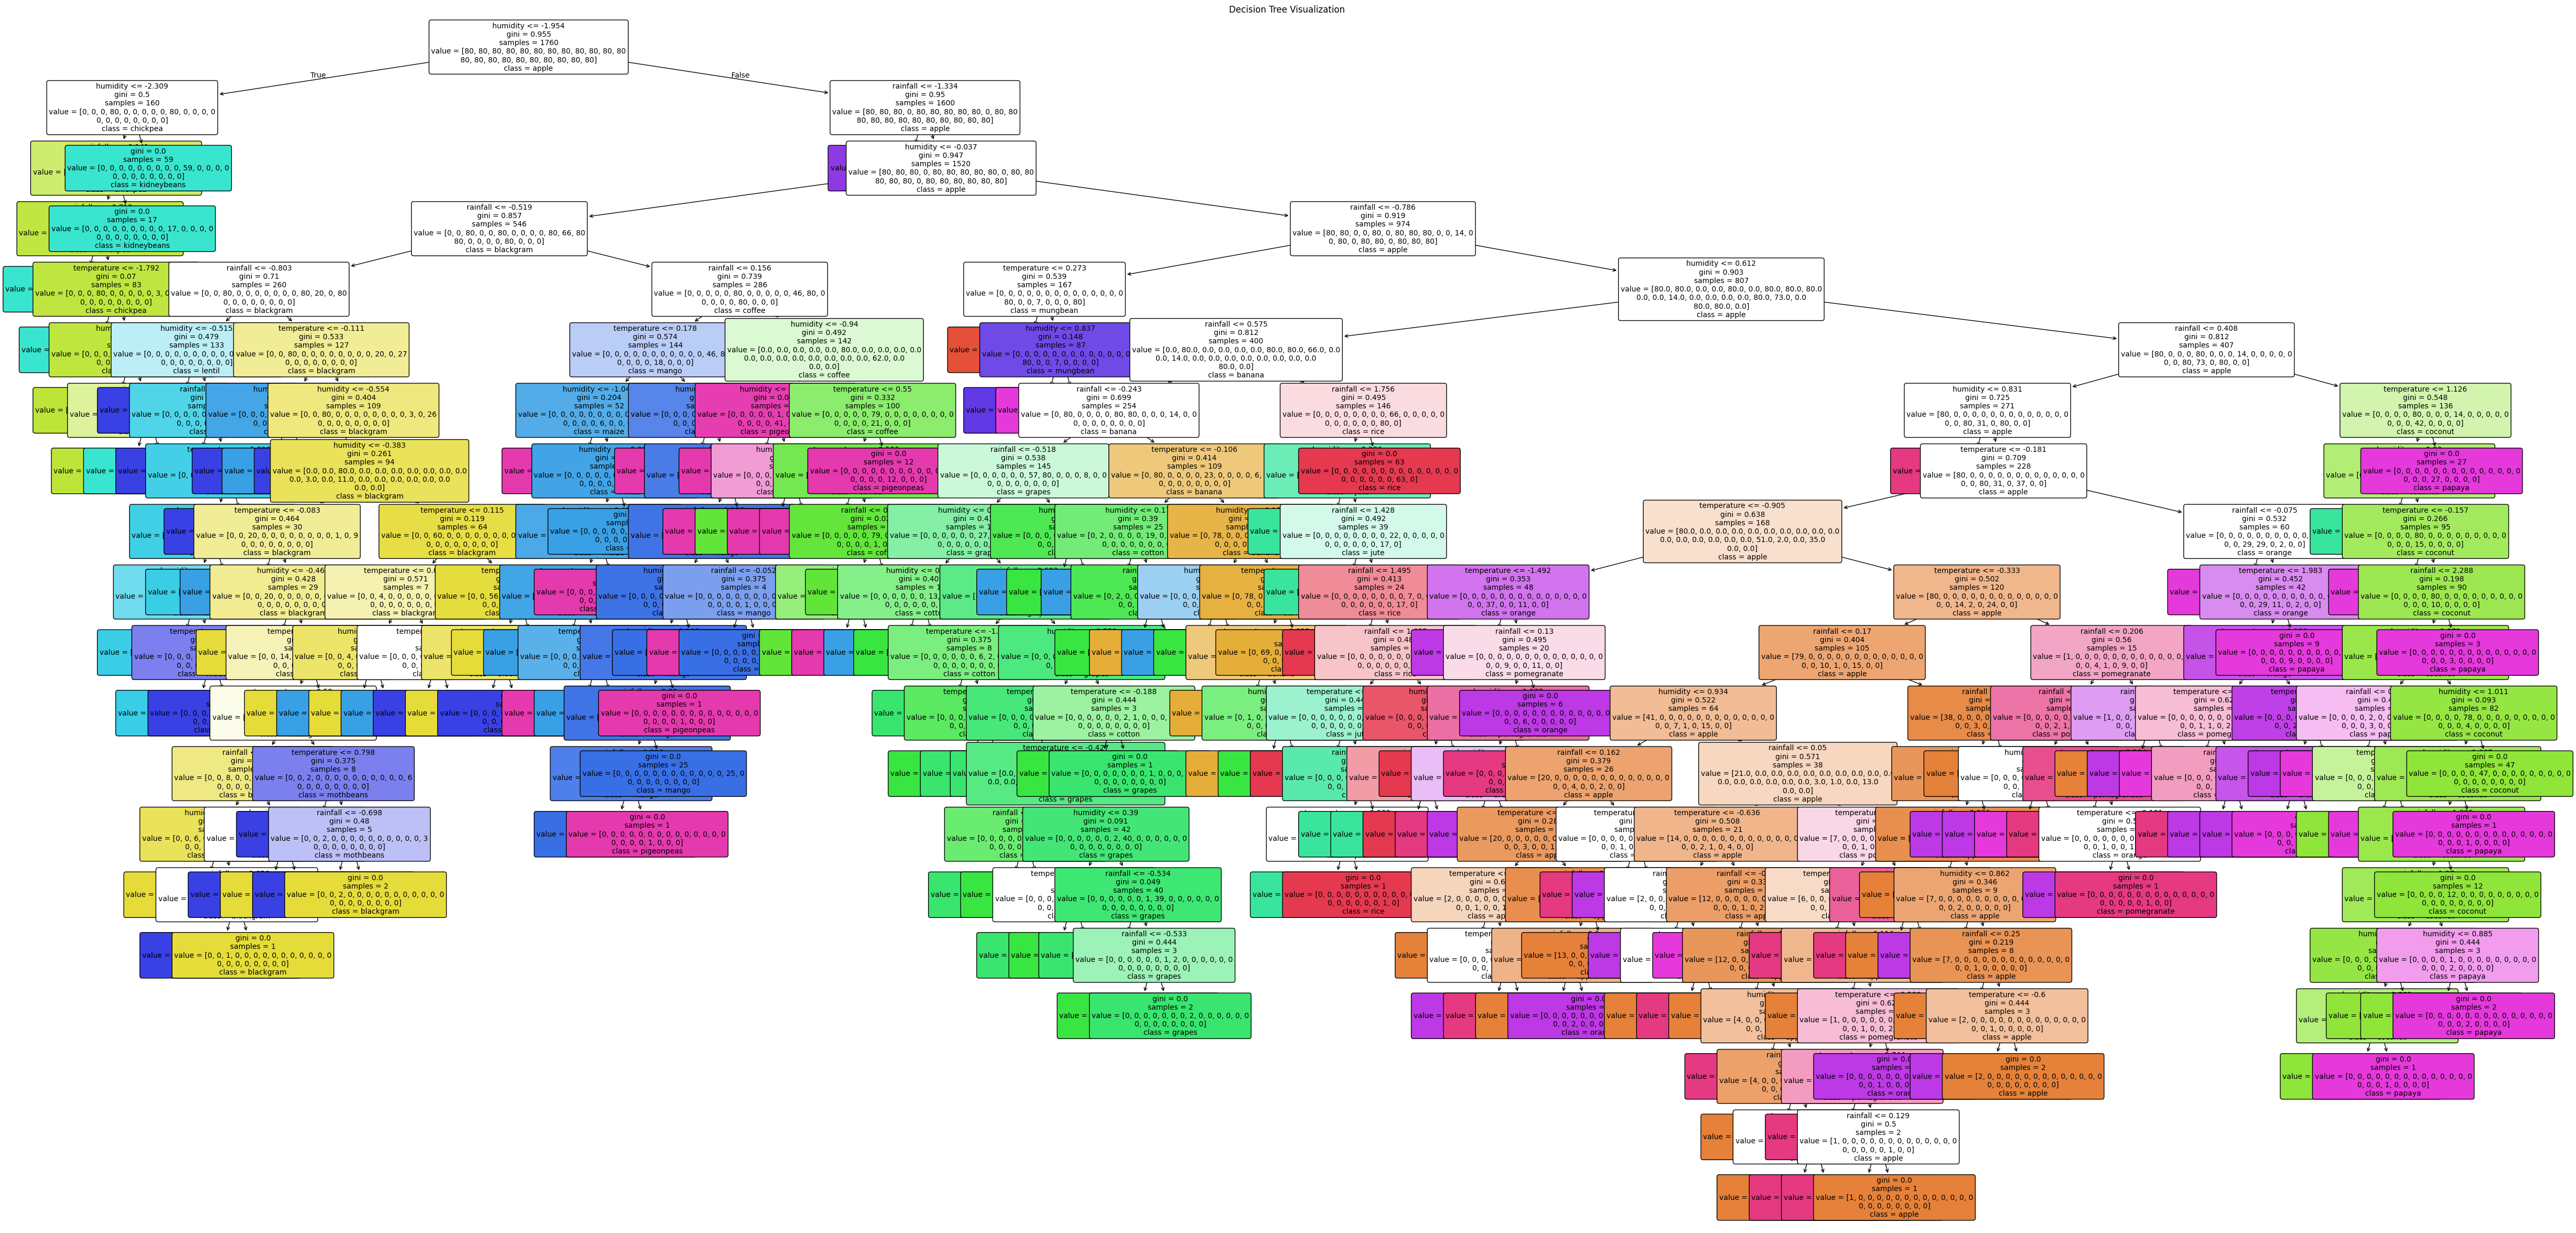

In [316]:
selected_features = ['temperature', 'humidity', 'rainfall']

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)  


plt.figure(figsize=(60, 30))
plot_tree(
    dt_model,
    feature_names=selected_features,
    class_names=le.classes_,  
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [317]:
dt_preds = DTC_model.predict(X_test)
evaluate_model(y_test, dt_preds, le.classes_)

Accuracy: 0.9318

Classification Report:
              precision    recall  f1-score   support

       apple       0.75      0.90      0.82        20
      banana       1.00      0.95      0.97        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      0.95      0.97        20
     coconut       1.00      0.95      0.97        20
      coffee       0.89      0.85      0.87        20
      cotton       0.86      0.95      0.90        20
      grapes       0.95      0.95      0.95        20
        jute       1.00      1.00      1.00        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      0.90      0.92        20
       maize       1.00      0.90      0.95        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.95      0.93        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.84      0.80      0

## <b> <font color=green> STEP (4)  Performance Tuning & Optimization </font> </b>

### 4.1) Algorithm Tuning
Optimize hyperparameters for better performance.

/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solv

Best Logistic Regression Params: {'C': 10, 'max_iter': 500, 'solver': 'lbfgs'}
Accuracy: 0.8000

Classification Report:
              precision    recall  f1-score   support

       apple       0.52      0.75      0.61        20
      banana       0.77      0.85      0.81        20
   blackgram       0.87      1.00      0.93        20
    chickpea       0.78      0.90      0.84        20
     coconut       0.83      1.00      0.91        20
      coffee       0.76      0.95      0.84        20
      cotton       0.70      0.70      0.70        20
      grapes       0.71      0.60      0.65        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.88      0.75      0.81        20
      lentil       0.94      0.85      0.89        20
       maize       0.94      0.80      0.86        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.90      0.88        20
    mungbean       0.82      0.90      0.86        20
   muskmelon   

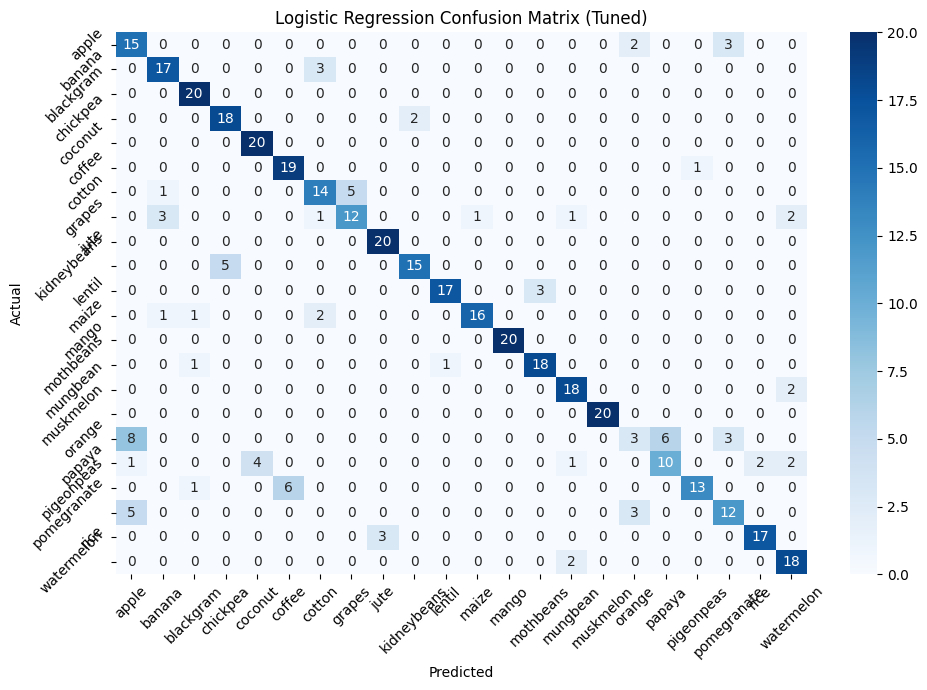

In [318]:
#Logistic Regression (Tuned)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# Initialize model
lr = LogisticRegression(random_state=42)

# Grid search with 5-fold CV
grid_lr = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)

# Best estimator
lr_best = grid_lr.best_estimator_

# Predict on test set
lr_preds = lr_best.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, lr_preds)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_preds, target_names=le.classes_))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()



/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
/home/eaqs.9922/.local/lib/python3.13/site-packages/sklearn/utils/_response.py:203: UserWarning: The number of unique classes is greater than 50% of the

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9295

Classification Report:
              precision    recall  f1-score   support

       apple       0.77      1.00      0.87        20
      banana       1.00      1.00      1.00        20
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      0.95      0.97        20
     coconut       0.95      1.00      0.98        20
      coffee       0.89      0.85      0.87        20
      cotton       0.86      0.95      0.90        20
      grapes       0.95      0.90      0.92        20
        jute       1.00      0.95      0.97        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      0.90      0.92        20
       maize       1.00      0.90      0.95        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
  

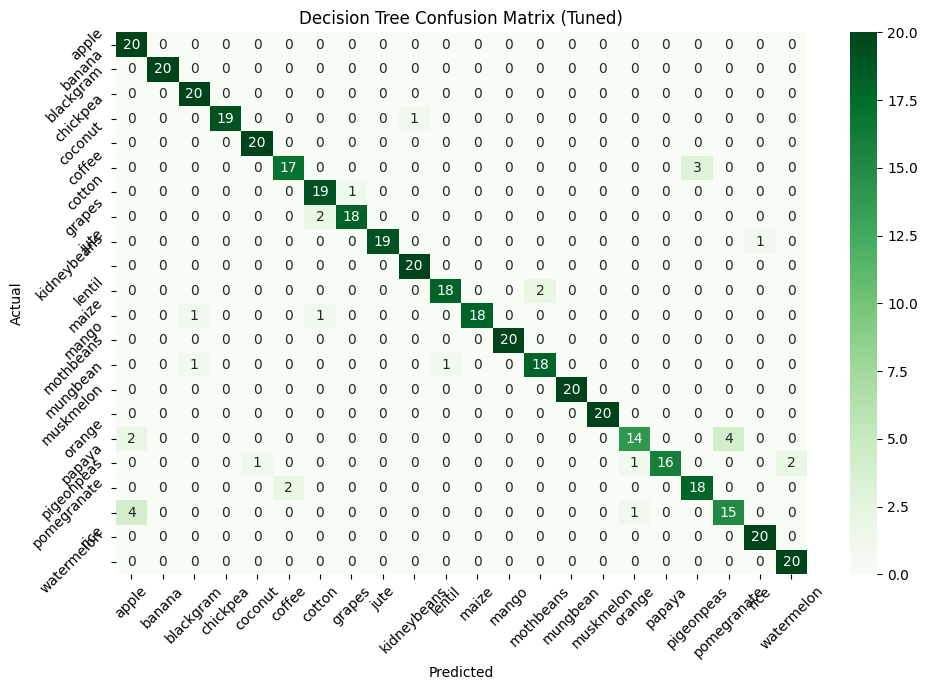

In [319]:
#Decision Tree (Tuned)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search with 5-fold CV
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)

# Best estimator
dt_best = grid_dt.best_estimator_

# Predict on test set
dt_preds = dt_best.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, dt_preds)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_preds, target_names=le.classes_))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, dt_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree Confusion Matrix (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()



Accuracy: 0.9341

Classification Report:
              precision    recall  f1-score   support

       apple       0.79      0.95      0.86        20
      banana       1.00      0.90      0.95        20
   blackgram       0.86      0.95      0.90        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.91      1.00      0.95        20
      coffee       0.90      0.95      0.93        20
      cotton       0.83      1.00      0.91        20
      grapes       1.00      0.90      0.95        20
        jute       1.00      0.95      0.97        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      0.95      0.95        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.94      0.85      0.89        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.93      0.70      0

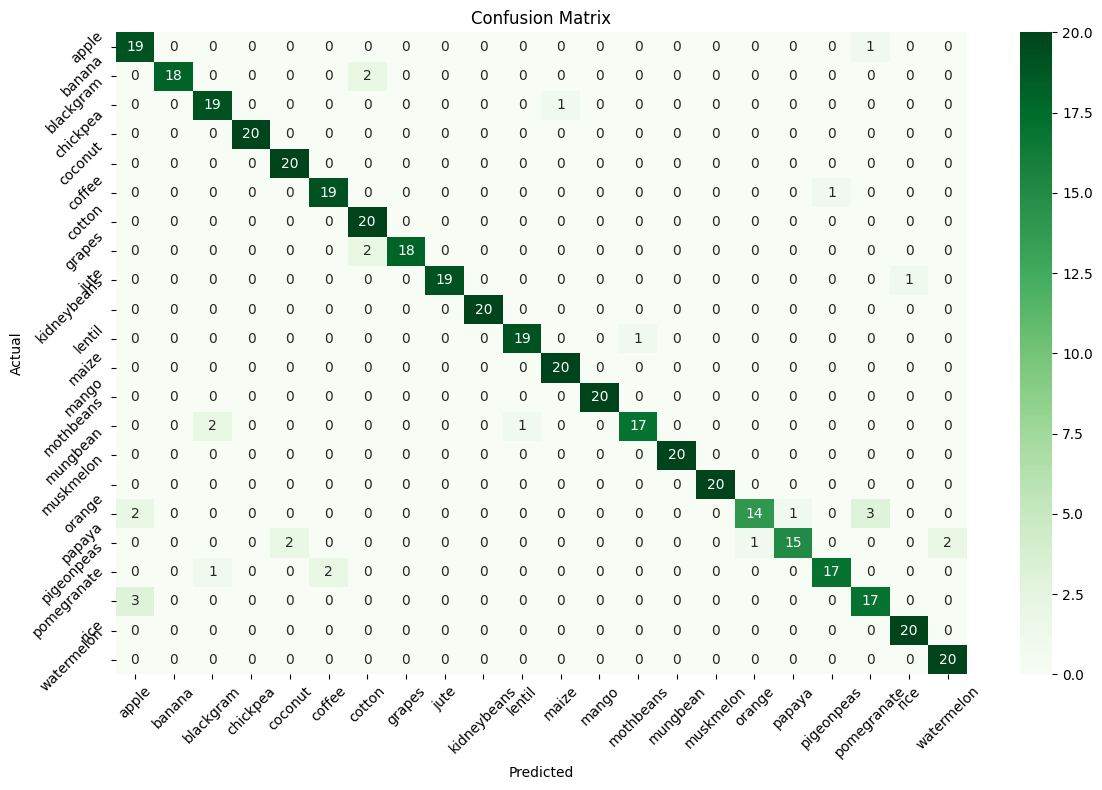

In [160]:
#Random Forest Ensembling

"""
After optimizatio:
choosing the best settings (hyperparameters) like the number of trees
(n_estimators) to improve how well the model performs.

doing this was a random idea 
"""
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
evaluate_model(y_test, rf_preds, le.classes_)


### 4.2) Ensembles
Combine multiple models to improve accuracy.

Accuracy: 0.8591

Classification Report:
              precision    recall  f1-score   support

       apple       0.54      1.00      0.70        20
      banana       0.80      1.00      0.89        20
   blackgram       0.87      1.00      0.93        20
    chickpea       0.79      0.95      0.86        20
     coconut       0.83      1.00      0.91        20
      coffee       0.76      0.95      0.84        20
      cotton       0.78      0.90      0.84        20
      grapes       0.93      0.70      0.80        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.94      0.75      0.83        20
      lentil       0.91      1.00      0.95        20
       maize       1.00      0.80      0.89        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      0.85      0.92        20
    mungbean       0.87      1.00      0.93        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.82      0.45      0

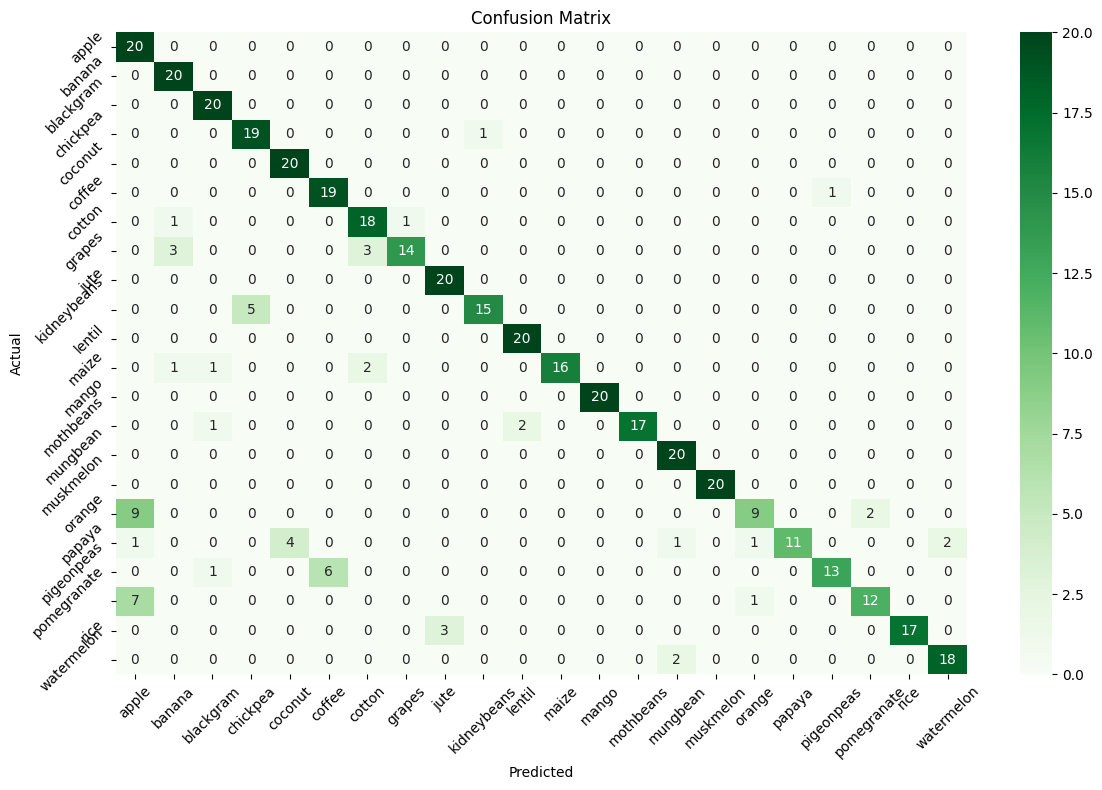

In [320]:
#Voting Classifier (Logistic + Decision Tree)
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_best),
    ('dt', dt_best)
], voting='hard')

voting_clf.fit(X_train, y_train)
voting_preds = voting_clf.predict(X_test)
evaluate_model(y_test, voting_preds, le.classes_)


In [327]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier

estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

In [328]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)
stack_preds = stacking_model.predict(X_test)
evaluate_model(y_test, stack_preds, le.classes_)

Accuracy: 0.9409

Classification Report:
              precision    recall  f1-score   support

       apple       0.78      0.90      0.84        20
      banana       1.00      0.95      0.97        20
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      0.95      0.97        20
     coconut       0.95      0.90      0.92        20
      coffee       0.91      1.00      0.95        20
      cotton       0.87      1.00      0.93        20
      grapes       1.00      0.90      0.95        20
        jute       1.00      1.00      1.00        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      0.90      0.92        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.94      0.85      0

## <b> <font color=green> STEP (6) Results Interpretation & Deployment </font> </b>

### 6.1) Predictions on Validation Dataset
Make predictions using the validation dataset.

Accuracy: 0.9409

Classification Report:
              precision    recall  f1-score   support

       apple       0.78      0.90      0.84        20
      banana       1.00      0.95      0.97        20
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      0.95      0.97        20
     coconut       0.95      0.90      0.92        20
      coffee       0.91      1.00      0.95        20
      cotton       0.87      1.00      0.93        20
      grapes       1.00      0.90      0.95        20
        jute       1.00      1.00      1.00        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      0.90      0.92        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       0.94      0.85      0

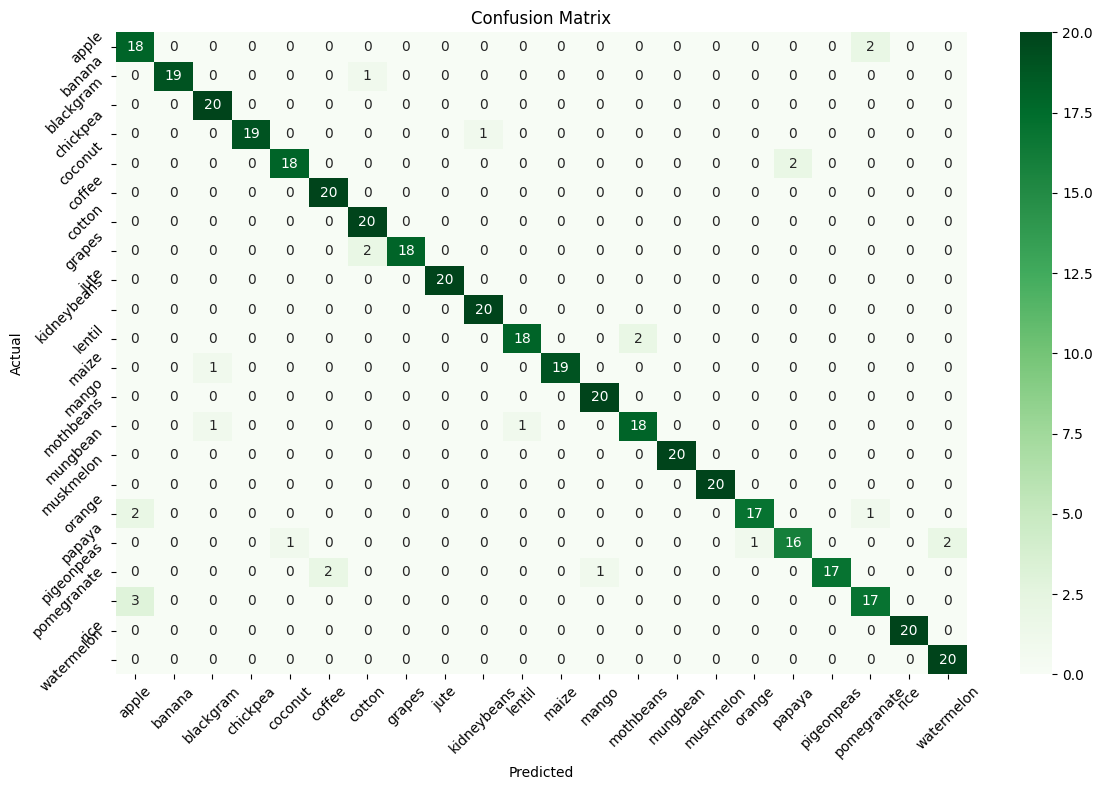

In [329]:
#Using the test set as my validation set 
val_preds = stacking_model.predict(X_test) 
# considering stacking_model is my trained ensemble model.
#X_test is the data it has never seen during training.
evaluate_model(y_test, val_preds, le.classes_) #

Accuracy: 0.9034

Classification Report:
              precision    recall  f1-score   support

       apple       0.68      0.91      0.78        23
      banana       0.75      1.00      0.86         9
   blackgram       0.80      0.89      0.84        18
    chickpea       1.00      1.00      1.00        21
     coconut       0.95      0.95      0.95        22
      coffee       0.93      1.00      0.97        14
      cotton       0.92      0.79      0.85        14
      grapes       0.88      1.00      0.94        15
        jute       0.89      1.00      0.94        17
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.94      1.00      0.97        15
       maize       0.88      0.94      0.91        16
       mango       1.00      0.93      0.96        14
   mothbeans       0.93      0.72      0.81        18
    mungbean       1.00      1.00      1.00        12
   muskmelon       1.00      1.00      1.00        20
      orange       0.67      0.62      0

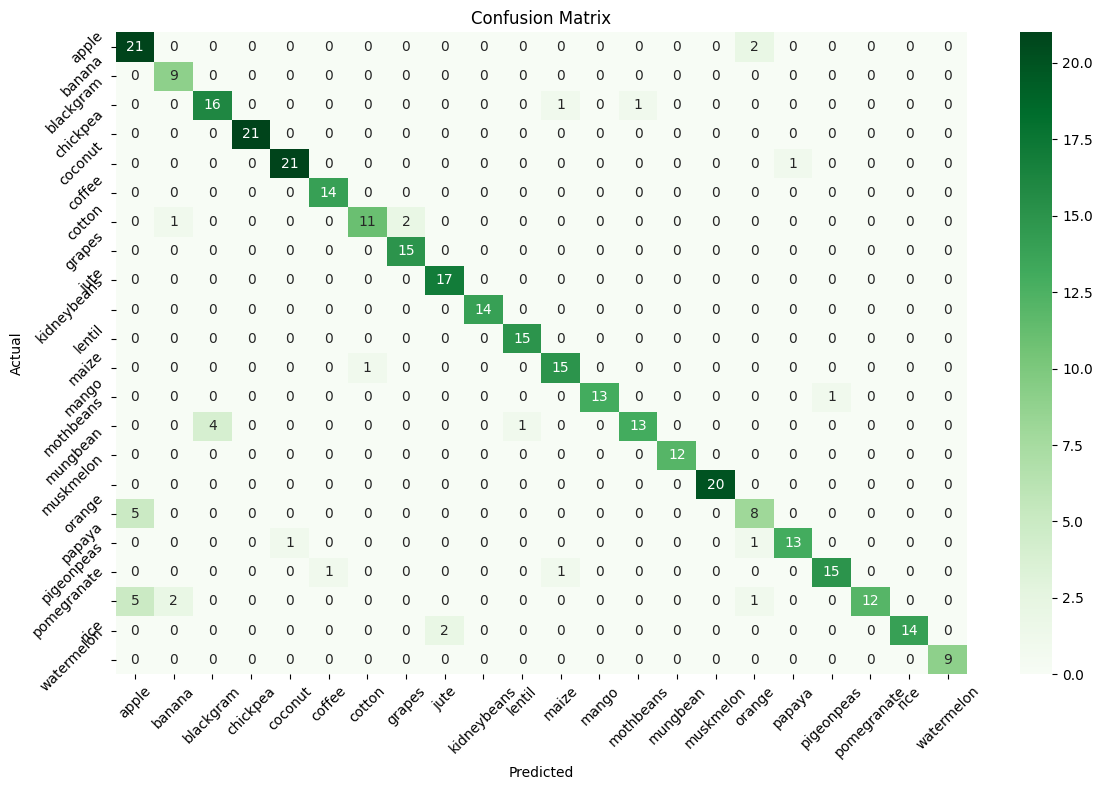

In [185]:
# Predict on validation set
val_preds = stacking_model.predict(X_val)

# Evaluate predictions
evaluate_model(y_val, val_preds, le.classes_)

In [336]:
results_df = pd.DataFrame({
    'Actual Crop': le.inverse_transform(y_test),
    'Predicted Crop': le.inverse_transform(val_preds)
})
print(results_df.head(50))

    Actual Crop Predicted Crop
0        orange          apple
1        banana         banana
2        cotton         cotton
3         maize          maize
4        orange         orange
5      chickpea       chickpea
6          rice           rice
7     blackgram      blackgram
8        banana         banana
9        orange          apple
10   watermelon     watermelon
11  pomegranate    pomegranate
12   watermelon     watermelon
13        maize          maize
14    mothbeans      mothbeans
15       grapes         grapes
16       grapes         grapes
17        mango          mango
18        mango          mango
19        apple          apple
20    blackgram      blackgram
21        apple          apple
22    mothbeans         lentil
23  kidneybeans    kidneybeans
24        apple          apple
25         jute           jute
26    mothbeans      mothbeans
27   watermelon     watermelon
28         rice           rice
29       coffee         coffee
30        mango          mango
31      

In [354]:
# 1. Select the features used in your model from the climate dataset
climate_features = ['temperature', 'humidity', 'rainfall']
X_climate = climate_df[climate_features]

# 2. Scale the climate dataset features using the same scaler you fitted on training data
X_climate_scaled = scaler.transform(X_climate)

# 3. Predict crop recommendations for all rows in the climate dataset
crop_preds_encoded = stacking_model.predict(X_climate_scaled)

# 4. Decode predicted labels back to crop names
crop_preds = le.inverse_transform(crop_preds_encoded)

# 5. Add the predictions as a new column in the climate dataset
climate_df['Recommended Crop'] = crop_preds

# 6. Display a sample of recommendations
print(climate_df[['temperature', 'humidity', 'rainfall', 'Recommended Crop']].head(10))


KeyError: "None of [Index(['temperature', 'humidity', 'rainfall'], dtype='object')] are in the [columns]"

In [355]:
print(climate_df.columns)


Index(['regions', 'indicators', 'stations', 'season', 'Unit', 'Date', 'Value'], dtype='object')


In [353]:
new_data = pd.DataFrame({
    'temperature': [30],
    'humidity': [80],
    'rainfall': [200]
})

# Scale it using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict the crop
predicted_crop = le.inverse_transform(stacking_model.predict(new_data_scaled))
print("Recommended crop:", predicted_crop[0])

Recommended crop: rice


### 6.2) Create Standalone Model on Entire Training Dataset
Train the final model on the entire dataset.

In [341]:
# Assuming stacking_model is your best model pipeline
# Combine train and validation datasets (X and y)
X_full = np.concatenate((X_train, X_val), axis=0)
y_full = np.concatenate((y_train, y_val), axis=0)

In [342]:
# Fit the final model on the entire dataset
stacking_model.fit(X_full, y_full)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

In [343]:
# Save or export the model as needed (optional)
import joblib
joblib.dump(stacking_model, 'final_crop_recommendation_model.pkl')

['final_crop_recommendation_model.pkl']

In [196]:
print("Final model trained on full dataset and saved.")

Final model trained on full dataset and saved.


### 6.3) Save Model for Later Use
Save the trained model to a file.

In [197]:
# Save the final trained model
joblib.dump(stacking_model, 'final_crop_recommendation_model.pkl')

Model saved as 'final_crop_recommendation_model.pkl'


In [198]:
print("Model saved as 'final_crop_recommendation_model.pkl'")

Model saved as 'final_crop_recommendation_model.pkl'


In [ ]:
#Future improvements:

#Recommend crops and vegetation not in the dataset using environmental similarity.
#Enable reverse prediction: suggest best locations for a given crop.
#Add real-time climate adaptation to update recommendations.